In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [3]:
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

In [4]:
#Create a new data frame with required columns
df.drop(["COMMENT_ID","AUTHOR","DATE"],axis=1,inplace=True)
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [5]:
#Check for missing values if there are any remove them
df.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

<function matplotlib.pyplot.legend>

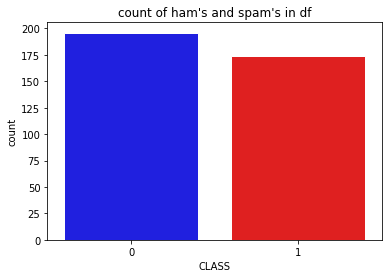

In [6]:
#Draw a count plot using seaborn for the column Class. Check how many records are there for spam and ham.
plt.title("count of ham's and spam's in df")
sns.set(style="darkgrid")
sns.countplot(df.CLASS,palette=["blue","red"])
plt.legend

Here, class0 is 196 and class 1 is 174 thus,class0 is greater than class1

In [7]:
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

##Bag of words and ML

In [8]:
#Apply CountVectorizer on the column Content
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.CONTENT,df.CLASS,test_size=0.2,random_state=1)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(296,)
(296,)
(74,)
(74,)


In [10]:
##CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer
#creating object for CountVectorizer
count_vect = CountVectorizer()

In [11]:
x_train_transformed = count_vect.fit_transform(x_train).toarray()
x_train_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
x_test_transformed = count_vect.transform(x_test)
x_test_transformed

<74x1217 sparse matrix of type '<class 'numpy.int64'>'
	with 1072 stored elements in Compressed Sparse Row format>

In [13]:
count_vect.get_feature_names()

['00',
 '000',
 '08',
 '10',
 '100',
 '101721377578919894134',
 '108k',
 '128gb',
 '13',
 '14',
 '14gkvdo',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1bsefqe',
 '1hmvtx',
 '1m00s',
 '20',
 '200',
 '2004',
 '200mm',
 '2010',
 '2013',
 '2015',
 '23',
 '25',
 '250',
 '320',
 '32gb',
 '33',
 '333',
 '35',
 '360',
 '385',
 '387',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '433',
 '4500',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '50',
 '500',
 '5000',
 '510',
 '515',
 '55',
 '550',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'ahead',
 'aid',
 'air',
 'aka',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'always',
 '

In [14]:
#Convert the count vectorizer output into a dataframe
feature_matrix = pd.DataFrame(x_train_transformed,columns=count_vect.get_feature_names())
feature_matrix

,00,000,08,10,100,101721377578919894134,108k,128gb,13,14,14gkvdo,15,16gb,17,18,19,1bsefqe,1hmvtx,1m00s,20,200,2004,200mm,2010,2013,2015,23,25,250,320,32gb,33,333,35,360,385,387,39,390,3d,...,wont,wooooo,word,words,work,working,works,world,worried,worth,would,wow,wrecking,write,writer,wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk,ww,www,x3333333333,ya,yall,ybuwyn,yea,yeah,year,years,yet,you,your,yourself,youtube,youtubers,zealous,zonepa,ｃｏｍ,ｅｂａｙ,ｈｔｔｐ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｕｓｒ,ｗｗｗ
0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,...,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#Apply Naive Bayes and check the metrics
#import BerNB
from sklearn.naive_bayes import BernoulliNB

#creating object for BerNB
model_BernNB = BernoulliNB()

In [16]:
model_BernNB.fit(x_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
#prediction on test data
#syntax:objectname.predict(Inputvalues)
y_test_pred = model_BernNB.predict(x_test_transformed)

In [18]:
#compare the actualvalues(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred)

array([[38,  1],
       [16, 19]])

In [19]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.95      0.54      0.69        35

    accuracy                           0.77        74
   macro avg       0.83      0.76      0.75        74
weighted avg       0.82      0.77      0.76        74



##TFIDF and ML

In [20]:
#TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#creating object for CfidfVectorizer
tfidf = TfidfVectorizer()

In [21]:
#apply tfidf to data(X_train)
x_train_transformed1 = tfidf.fit_transform(x_train).toarray()
x_train_transformed1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27745444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
x_test_transformed1 = tfidf.transform(x_test).toarray()
x_test_transformed1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf.get_feature_names()

['00',
 '000',
 '08',
 '10',
 '100',
 '101721377578919894134',
 '108k',
 '128gb',
 '13',
 '14',
 '14gkvdo',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1bsefqe',
 '1hmvtx',
 '1m00s',
 '20',
 '200',
 '2004',
 '200mm',
 '2010',
 '2013',
 '2015',
 '23',
 '25',
 '250',
 '320',
 '32gb',
 '33',
 '333',
 '35',
 '360',
 '385',
 '387',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '433',
 '4500',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '50',
 '500',
 '5000',
 '510',
 '515',
 '55',
 '550',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'ahead',
 'aid',
 'air',
 'aka',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'always',
 '

In [24]:
#Convert the tf-idf output into a dataframe
feature_matrix1 = pd.DataFrame(x_train_transformed1,columns=tfidf.get_feature_names())
feature_matrix1

,00,000,08,10,100,101721377578919894134,108k,128gb,13,14,14gkvdo,15,16gb,17,18,19,1bsefqe,1hmvtx,1m00s,20,200,2004,200mm,2010,2013,2015,23,25,250,320,32gb,33,333,35,360,385,387,39,390,3d,...,wont,wooooo,word,words,work,working,works,world,worried,worth,would,wow,wrecking,write,writer,wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk,ww,www,x3333333333,ya,yall,ybuwyn,yea,yeah,year,years,yet,you,your,yourself,youtube,youtubers,zealous,zonepa,ｃｏｍ,ｅｂａｙ,ｈｔｔｐ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｕｓｒ,ｗｗｗ
0,0.0,0.0,0.000000,0.0,0.0,0.296797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148398,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.544606,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.277454,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.258707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.367566,0.0,0.000000,0.000000,0.0,0.298304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451741,0.0,0.0,...,0.0,0.000000,0.0,0.110871,0.085257,0.0,0.0,0.067426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110871,0.0,0.000000,0.0,0.147909,0.064204,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000

In [25]:
#position of words in sparse matrix
tfidf.vocabulary_

{'definitley': 302,
 'the': 1035,
 'song': 962,
 'for': 407,
 '2010': 23,
 'when': 1147,
 'im': 537,
 'not': 731,
 'listening': 618,
 'to': 1058,
 'gypsy': 477,
 'shakira': 920,
 'rocks': 885,
 'br': 191,
 'span': 975,
 'class': 240,
 'proflinkwrapper': 830,
 'proflinkprefix': 829,
 'proflink': 828,
 'href': 523,
 'https': 527,
 'plus': 803,
 'google': 462,
 'com': 250,
 '101721377578919894134': 5,
 'oid': 741,
 'shakiravevo': 921,
 'is': 564,
 'my': 707,
 'favourite': 384,
 'singer': 937,
 'wooooo': 1178,
 'wanna': 1125,
 'earn': 335,
 'money': 688,
 'online': 749,
 'without': 1171,
 'investment': 559,
 'just': 577,
 'visit': 1112,
 'this': 1047,
 'link': 613,
 'therglove': 1042,
 'blogspot': 181,
 'in': 541,
 '2013': 24,
 '08': 2,
 'blog': 179,
 'post_10': 811,
 'html': 525,
 'youtube': 1207,
 'comments': 256,
 'be': 156,
 'like': 609,
 'so': 954,
 'years': 1202,
 'ago': 91,
 'where': 1148,
 'are': 133,
 'shakifans': 919,
 'she': 926,
 'sooooo': 967,
 'beautiful': 157,
 'very': 1101,

In [26]:
#Idf of terms
tfidf.idf_


array([6.00058496, 4.74782199, 6.00058496, ..., 6.00058496, 6.00058496,
       6.00058496])

In [27]:

#Apply Naive Bayes and check the metrics
#import BerNB
from sklearn.naive_bayes import BernoulliNB

#creating object for BerNB
model_BernNB1 = BernoulliNB()

In [28]:
model_BernNB1.fit(x_train_transformed1,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:

#prediction on test data
#syntax:objectname.predict(Inputvalues)
y_test_pred1 = model_BernNB1.predict(x_test_transformed1)

In [30]:
#compare the actualvalues(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred1)

array([[38,  1],
       [16, 19]])

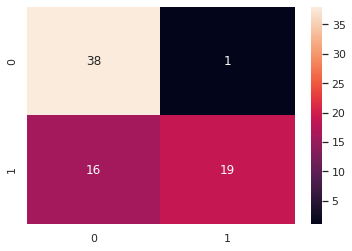

In [31]:
sns.heatmap(confusion_matrix(y_test,y_test_pred1),annot=True,fmt="d")

In [32]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.95      0.54      0.69        35

    accuracy                           0.77        74
   macro avg       0.83      0.76      0.75        74
weighted avg       0.82      0.77      0.76        74



In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred1)

0.7702702702702703